# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

ModuleNotFoundError: No module named 'api_keys'

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
from pprint import pprint

In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get( city_url).json()
      
       
           # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | vorgashor
Processing Record 3 of Set 1 | makarov
Processing Record 4 of Set 1 | happy valley-goose bay
Processing Record 5 of Set 1 | ingeniero guillermo n. juarez
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | albufeira
Processing Record 10 of Set 1 | richards bay
Processing Record 11 of Set 1 | vadso
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | basco
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | tolanaro
Processing Record 18 of Set 1 | harper
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | camana
Processing Record 22 of Set 1 | edinb

In [5]:
  pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 16.7667, 'lon': 77.1333},
 'dt': 1689613338,
 'id': 1252822,
 'main': {'feels_like': 299.11,
          'grnd_level': 966,
          'humidity': 77,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 298.51,
          'temp_max': 298.51,
          'temp_min': 298.51},
 'name': 'Yadgir',
 'sys': {'country': 'IN', 'sunrise': 1689553598, 'sunset': 1689600484},
 'timezone': 19800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 255, 'gust': 12.75, 'speed': 7.07}}


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame( city_data)
# Show Record Count
city_data_df.count()



City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,295.20,69,99,6.69,PN,1689612921
1,vorgashor,67.5833,63.9500,285.94,86,21,3.00,RU,1689612963
2,makarov,48.6333,142.8000,286.82,93,94,1.69,RU,1689613045
3,happy valley-goose bay,53.3168,-60.3315,293.32,94,100,3.09,CA,1689613046
4,ingeniero guillermo n. juarez,-23.9000,-61.8500,291.67,46,100,3.38,AR,1689613046


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/citiestt.csv", index_label="City_ID")

#Boot-camp/6th-week/Module_6_challenge/python-api-challenge/WeatherPy/WeatherPy.ipynb/output_data

In [19]:
# Read saved data
city_data_df = pd.read_csv("../output_data/citiestt.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,295.20,69,99,6.69,PN,1689612921
1,vorgashor,67.5833,63.9500,285.94,86,21,3.00,RU,1689612963
2,makarov,48.6333,142.8000,286.82,93,94,1.69,RU,1689613045
3,happy valley-goose bay,53.3168,-60.3315,293.32,94,100,3.09,CA,1689613046
4,ingeniero guillermo n. juarez,-23.9000,-61.8500,291.67,46,100,3.38,AR,1689613046


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", facecolors="green", edgecolors="black",
            s=x_values, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Temprature (2022-10-8)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig_Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

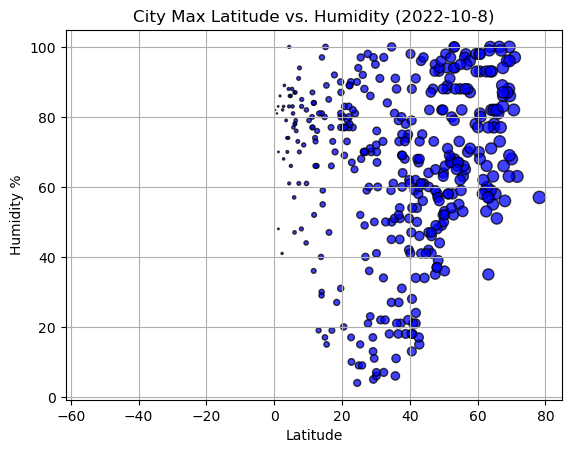

In [26]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("City Max Latitude vs. Humidity (2022-10-8)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

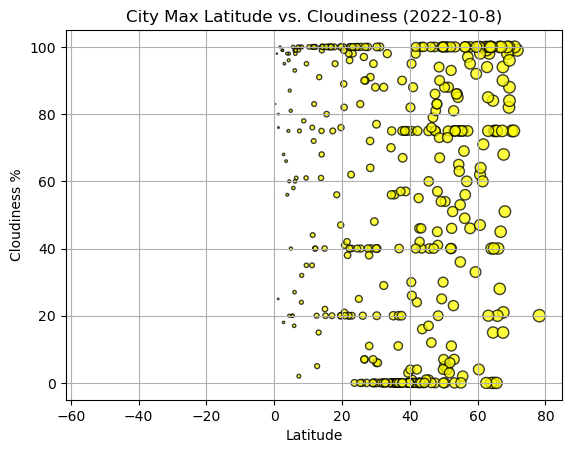

In [27]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", facecolors="yellow", edgecolors="black",
            s=x_values, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("City Max Latitude vs. Cloudiness (2022-10-8)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

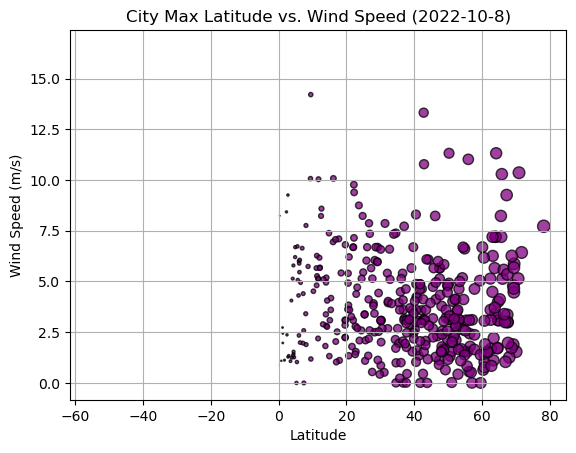

In [29]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", facecolors="purple", edgecolors="black",
            s=x_values, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Max Latitude vs. Wind Speed (2022-10-8)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig_Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
#x_values = city_data_df["Lat"].astype("float")
#y_values = city_data_df["Wind Speed"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vorgashor,67.5833,63.9500,285.94,86,21,3.00,RU,1689612963
2,makarov,48.6333,142.8000,286.82,93,94,1.69,RU,1689613045
3,happy valley-goose bay,53.3168,-60.3315,293.32,94,100,3.09,CA,1689613046
5,talnakh,69.4865,88.3972,284.38,86,99,5.87,RU,1689613047
6,qaqortoq,60.7167,-46.0333,284.13,81,62,1.41,GL,1689613047


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <=0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.066,-130.1015,295.20,69,99,6.69,PN,1689612921
4,ingeniero guillermo n. juarez,-23.900,-61.8500,291.67,46,100,3.38,AR,1689613046
7,port elizabeth,-33.918,25.5701,289.31,82,0,3.60,ZA,1689613047
9,richards bay,-28.783,32.0377,292.36,80,0,4.66,ZA,1689613048
11,ushuaia,-54.800,-68.3000,276.94,75,40,1.54,AR,1689612785


###  Temperature vs. Latitude Linear Regression Plot

Text(6, 10, 'y = -0.26x + 307.19')

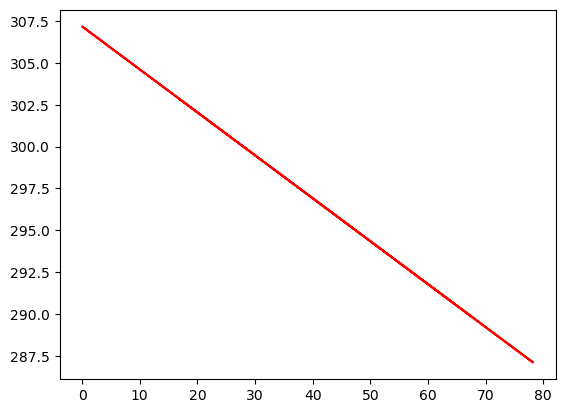

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

Text(6, 10, 'y = 0.52x + 303.54')

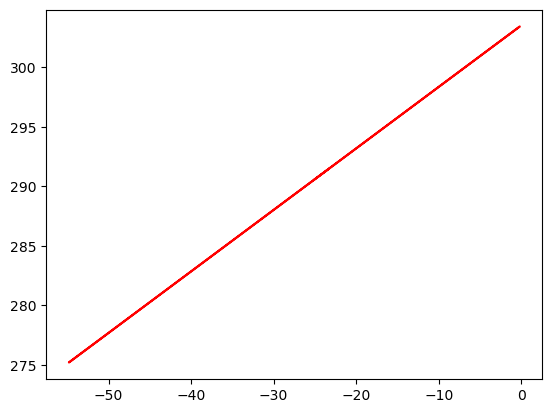

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [ ]:
#There is a very weak correlation between poverty rates and bank counts. Keep in mind that linear regression will not consider other factors such as population or size of the city.


**Discussion about the linear relationship:**
-There is a very weak correlation between positive latitude and temperature, that means the relationship between both is negative.
-There is a strong correlation between negative latitude and temperature, that means the relationship between both is positive

### Humidity vs. Latitude Linear Regression Plot

Text(6, 10, 'y = 0.1x + 61.96')

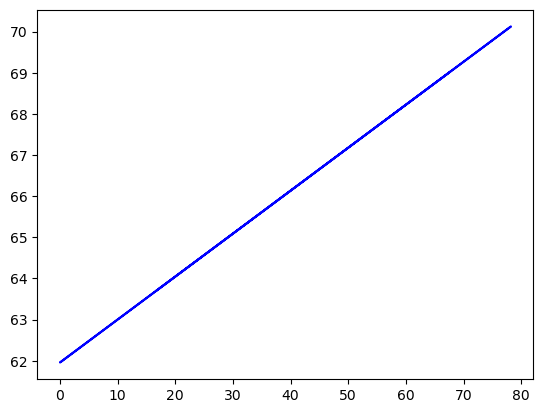

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

Text(6, 10, 'y = -0.24x + 60.29')

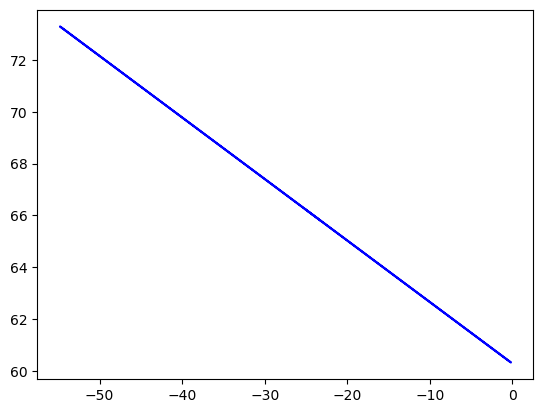

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

**Discussion about the linear relationship:** 
-There is a very weak correlation between negative latitude and Humidity, that means the relationship between both is negative.
-There is a strong correlation between positive latitude and Humidity, that means the relationship between both is positive

### Cloudiness vs. Latitude Linear Regression Plot

Text(6, 10, 'y = -0.06x + 57.0')

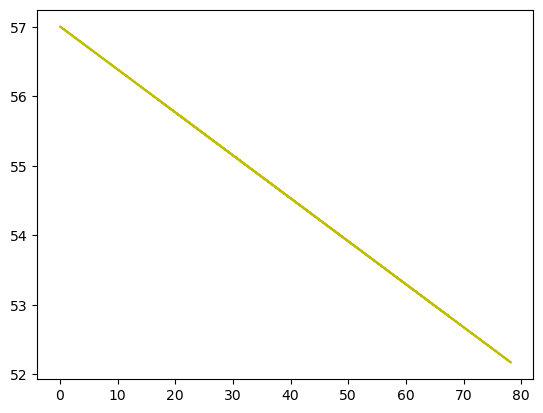

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

Text(6, 10, 'y = 0.34x + 48.01')

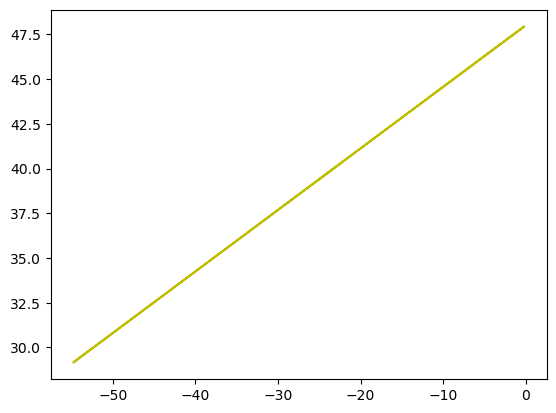

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

**Discussion about the linear relationship:** 
-There is a very weak correlation between positive latitude and Cloudiness, that means the relationship between both is negative.
-There is a strong correlation between negative latitude and Cloudiness, that means the relationship between both is positive

### Wind Speed vs. Latitude Linear Regression Plot

Text(6, 10, 'y = -0.01x + 4.2')

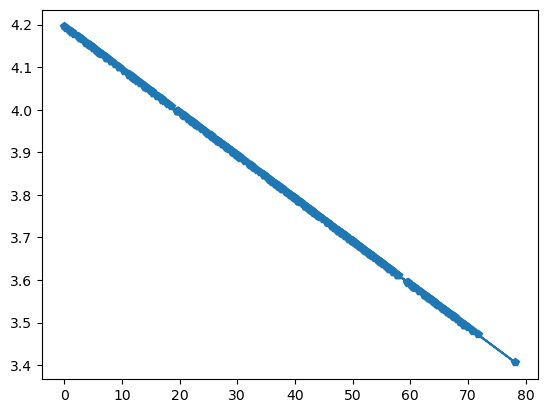

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"p-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

Text(6, 10, 'y = 0.0x + 3.69')

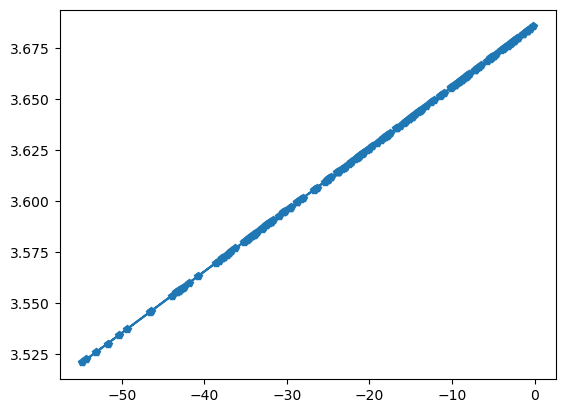

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"p-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

**Discussion about the linear relationship:**
-There is a very weak correlation between positive latitude and Wind Speed, that means the relationship between both is negative.
-There is a strong correlation between negative latitude and Wind Speed, that means the relationship between both is positive